In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction

This notebook demonstrates how to retrieve SMAP data via OpenDAP from NSIDC. Specifically, we will:
* Retrieve data for a specified date and region
* Retrieve data for specified points over a date range

<div style='display:flex;'>
    <div style='float:right; margin-left:100px;'><img src='../../../images/SMAP-example-region.png' style='width:100%;'/></div>
    <div style='float:left; margin-right:100px;'><img src='../../../images/SMAP-example-time.png' style='width:100%;'/></div>
</div>

<small>*For instructions on using Jupyter notebooks, see the [README.md](../../../README.md) file.*</small>


# Setup

Make sure you have PODPAC installed with the **datatype** optional dependencies:

```
$ pip install podpac[datatype]
```

# How to retrieve SMAP data using PODPAC

## Provide Earth Data Login Credentials
If you do not have an earth data login, or have not activated OpenDAP access, follow the [instructions here](https://podpac.org/earthdata.html).

In [2]:
import getpass
username = password = None
username = input("Username:");   password = getpass.getpass('Password:')

Username: mpuecker
Password: ··················


## Create the PODPAC SMAP Node

In [3]:
import podpac
import podpac.datalib  # imports external data wrapper for PODPAC

# Create the SMAP node
product = 'SPL4SMAU'   # Level 4 soil moisture analysis update
smap = podpac.datalib.SMAP(product=product,
                           interpolation='nearest',
                           username=username, password=password)
smap

<SMAP()>

##  Retrieve data for a specified date and region

This example:

* Retrieves data from NSIDC via OpenDAP
* Only downloads data for the requested region and data product
* Caches it locally
* Automatically does nearest-neighbor interpolation to the user's specified grid

In [4]:
# Specify region of interest on a uniform grid
lat = podpac.crange(  60,  10, -2.0)  # (start, stop, step)
lon = podpac.crange(-130, -60,  2.0)  # (start, stop, step)

# Specify date and time
time = '2018-03-19T12:00:00'

# Create the PODPAC Coordinates
coords = podpac.Coordinates([lat, lon, time], dims=['lat', 'lon', 'time'])

# Evaluate the node to retrieve and interpolate the data
# (this will take a little while depending on network connection and NSIDC response)
smap_data = smap.eval(coords)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


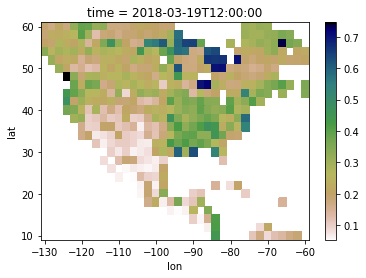

In [5]:
# Plot the result
smap_data.plot(cmap='gist_earth_r')    # cmap species the colormap of the colorbar
pass

## Retrieve data for specified points over a date range

This example:

* Retrieves subset of data from NSIDC via OpenDAP
* Caches it locally
* Accesses multiple (24) SMAP files in parallel

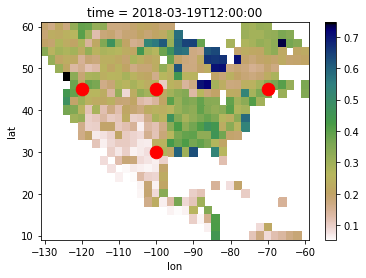

In [6]:
# Specify a few (lat, lon) points to get data for
lat_pts = [45.0, 45.0,  45.0, 30.0]
lon_pts = [-100.0, -70, -120.0, -100.0]

# Plot the points on top of the SMAP data
smap_data.plot(cmap='gist_earth_r')                 # plots smap data
plot(lon_pts, lat_pts, 'r.', ms=25)   # plots point on map (defined above)
pass

In [7]:
# Specify the time range
time = podpac.crange('2018-05-15T00', '2018-05-19T00', '3,h')

# Create the PODPAC coordinates
coords = podpac.Coordinates([(lat_pts, lon_pts), time], dims=['lat_lon', 'time'])

# To improve the speed of data retrieval, make 6 requests in parallel
podpac.settings["MULTITHREADING"] = False  # This might be needed depending on local settings
podpac.settings["N_THREADS"] = 6
interpolation = {
    'method': 'nearest',
    'params': {
        'time_tolerance': np.timedelta64(2, 'h')
    }
}
smap = podpac.datalib.SMAP(product=product,
                           interpolation=interpolation,
                           username=username, password=password)

# Evaluate the node to retrieve and interpolate the data
# (this will take a little while depending on network connection and NSIDC response)
smap_data = smap.eval(coords)

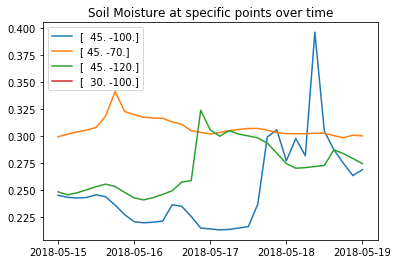

In [8]:
# Plot the results
plot(smap_data.time, smap_data.transpose())
title('Soil Moisture at specific points over time')

# add a legend showing the (lat, lon) coordinates of each time series
legend([str(points) for points in np.array([lat_pts, lon_pts]).transpose()])

# fix the time ticks along the x-axis
locs, labels = xticks()
ax = xticks(locs[::2])
pass